# Introduction to regression models

★ Create your own linear model
★ Analyse correlation
★ Creating your linear model by hand
★ Find the best parameters with an algorithm
★ Predict wine quality - regression problem
★ Simple Linear regression
★ Multi linear regression
★ Simple Logistic regression
★ Multi logistic regression

Import relevant libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model

## Load data

In [7]:
wine_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')

In [8]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Get 100 samples with random state (seed) = 1

In [267]:
sample_wine_df = wine_df.sample(n=100,random_state=1)
sample_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
75,8.8,0.410,0.64,2.2,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,5
1283,8.7,0.630,0.28,2.7,0.096,17.0,69.0,0.99734,3.26,0.63,10.2,6
408,10.4,0.340,0.58,3.7,0.174,6.0,16.0,0.99700,3.19,0.70,11.3,6
1281,7.1,0.460,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4,6
1118,7.1,0.390,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
529,9.9,0.630,0.24,2.4,0.077,6.0,33.0,0.99740,3.09,0.57,9.4,5
912,10.0,0.460,0.44,2.9,0.065,4.0,8.0,0.99674,3.33,0.62,12.2,6
1227,9.0,0.580,0.25,2.0,0.104,8.0,21.0,0.99769,3.27,0.72,9.6,5
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3


## Create your own linear model

Plot pH in function of fixed acidity

In [10]:
[str(x) for x in list(range(5,15))]

['5', '6', '7', '8', '9', '10', '11', '12', '13', '14']

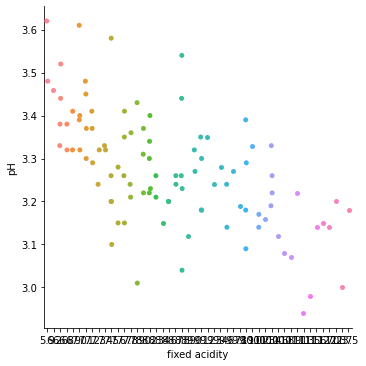

In [235]:
s_x=sample_wine_df['fixed acidity']
s_y=sample_wine_df['pH']
g = sns.catplot(x=s_x, y=s_y, data=sample_wine_df)

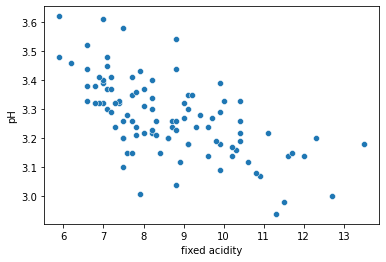

In [236]:
sns.scatterplot(x=sample_wine_df["fixed acidity"], y=sample_wine_df["pH"]);

### Analyse correlation 

What can you say about pH and fixed acidity? are they correlated ? 

In [237]:
corr = sample_wine_df.corr()

<AxesSubplot:>

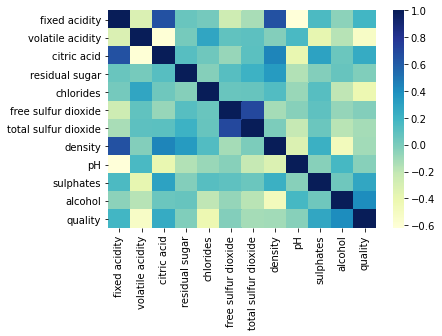

In [268]:
#heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

In [269]:
#unstack correlation matrix 
corr_df = corr.unstack().reset_index() 
corr_df

#rename columns
corr_df.columns = ['feature_1','feature_2', 'correlation'] 

#sort by correlation
corr_df.sort_values(by="correlation",ascending=False, inplace=True) 

#remove self correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] 
corr_df.head()

,feature_1,feature_2,correlation
66,free sulfur dioxide,total sulfur dioxide,0.697088
77,total sulfur dioxide,free sulfur dioxide,0.697088
2,fixed acidity,citric acid,0.658054
24,citric acid,fixed acidity,0.658054
7,fixed acidity,density,0.652115


In [240]:
pH_corr_df = corr_df[corr_df['feature_1'] == 'pH']
pH_corr_df[pH_corr_df['feature_2'] == 'fixed acidity']

,feature_1,feature_2,correlation
96,pH,fixed acidity,-0.619941


### Creating your  linear model by hand

Try to find a linear model by hand. plot it with the sample set

Hint: define an intercept and slope. Then, plot it graphically

y = a * x + b, where a is slope and b is intercept

In [241]:
def plot_line(a, b, ax):
    """Plot a line from slope and intercept on the ax"""
    x_vals = np.array(ax.get_xlim())
    y_vals = a * x_vals + b
    ax.plot(x_vals, y_vals, '-')

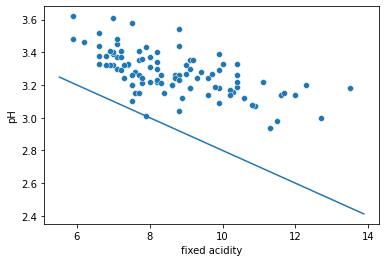

In [242]:
ax = sns.scatterplot(x="fixed acidity", y="pH", data=sample_wine_df)
plot_line(-0.1, 3.8, ax)

### Find the best linear model by hand

what is the best linear model you can find ? try to define different intercepts and slopes by hand

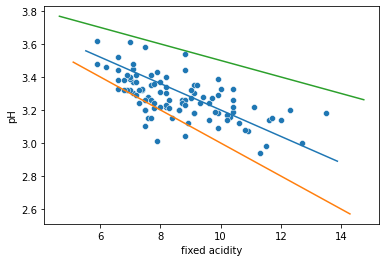

In [243]:
ax = sns.scatterplot(x="fixed acidity", y="pH", data=sample_wine_df)
a_list = [-0.08, -0.1, -0.05]
b_list = [4, 4, 4]
for i in range(len(a_list)):
    plot_line(a_list[i], b_list[i], ax)

Compare to seaborn regplot

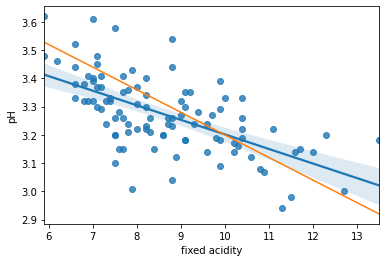

In [244]:
# plot your linear model with regplot and compare
ax = sns.regplot(y='pH', x='fixed acidity', data=sample_wine_df)
plot_line(-0.08, 4, ax)

How far is your linear model from seaborn model?

In [270]:
#the slope is higher than the one calculated by regplot

How do you evaluate the performance of your linear models at each iteration ?

In [272]:
#using a loss function to evaluate the difference between observations and predictions

In [275]:
#function calculate square errors
def squared_errors(slope, intercept, fixed_acidity, pH):
    return (pH - ((slope * fixed_acidity) + intercept)) ** 2

In [276]:
#function calculate MSE
def mse(slope, intercept, fixed_acidity, pH):
    errors = squared_errors(slope, intercept, fixed_acidity, pH)
    return np.mean(errors)

In [277]:
mse(-0.1, 4, sample_wine_df["fixed acidity"], sample_wine_df.pH)

0.035038000000000034

In [278]:
squared_errors(-0.1, 4, sample_wine_df["fixed acidity"], sample_wine_df.pH).sum()

3.5038000000000027

### Find the best parameters with an algorithm

Try to create a method where each time you define a slope or intercept, you reduce the error of the model. Then, you iterate to find the best model

Hint: choose a fixed intercept, find the slope that reduce the error of the model. Then keep that slope, find the new intercept that reduce the error of the model ...

##### Fixing intercept to find best slope

In [245]:
intercept_initial_guess = 4 # For instance, we may suppose there is always a small transaction fee even for very small flats?

#create a range of 100 slopes which contains what you believe is the optimal slope (hint: np.linspace())
slope_range = np.linspace(-0.1,-0.05,100)

#create the list of MSEs for each slope value
mses = list(map(lambda x: mse(x, intercept_initial_guess, sample_wine_df["fixed acidity"], sample_wine_df.pH), slope_range))

Text(0, 0.5, 'MSE')

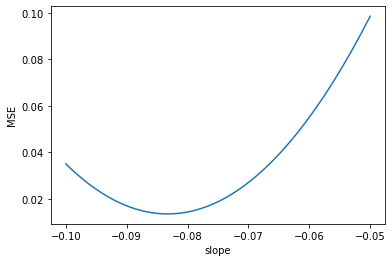

In [246]:
#plot MSEs against slopes. Do you see a minimum? If not, try another range of slopes!
plt.plot(slope_range, mses)
plt.xlabel("slope")
plt.ylabel("MSE")

In [247]:
mse_min = min(mses)
slope_best = slope_range[mses.index(mse_min)]
print('mse_min:', mse_min)
print('slope_best:', slope_best)

mse_min: 0.013490916666666677
slope_best: -0.08333333333333334


##### Fixing best slope to find best intercept

Text(0, 0.5, 'MSE')

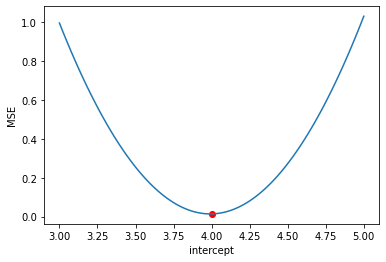

In [279]:
#create a range of 100 intercepts which contains what you believe is the optimal intercept
intercept_range = np.linspace(3,5, 100)

#create the list of MSEs for each intercept value
mses = list(map(lambda x: mse(slope_best, x, sample_wine_df["fixed acidity"], sample_wine_df.pH), intercept_range))

#plot MSEs against slopes. Do you see a minimum? If not, try another range of slopes!
plt.plot(intercept_range, mses)
plt.scatter(intercept_initial_guess, mse(slope_best, intercept_initial_guess, sample_wine_df["fixed acidity"], sample_wine_df.pH), color = 'r')
plt.xlabel('intercept')
plt.ylabel("MSE")

In [249]:
# Compute the min value of MSEs for slope=slope_best and store the corresponding best intercept
mse_min = min(mses)
intercept_best = intercept_range[mses.index(mse_min)]

print('mse_min:', mse_min)
print('intercept_best:', intercept_best)

mse_min: 0.013416852795633101
intercept_best: 3.98989898989899


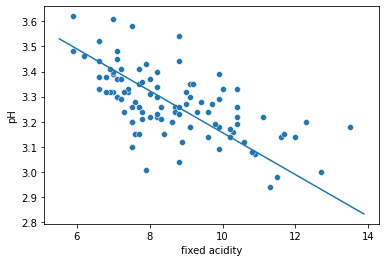

In [250]:
ax = sns.scatterplot(x="fixed acidity", y="pH", data=sample_wine_df)
plot_line(slope_best, intercept_best, ax)

How many iterations did you tried ? what are the best intercept and slope you found? Are you closer to the seaborn linear model ?  

In [251]:
# just 2 iterations. 
print(slope_best)
print(intercept_best)


-0.08333333333333334
3.98989898989899


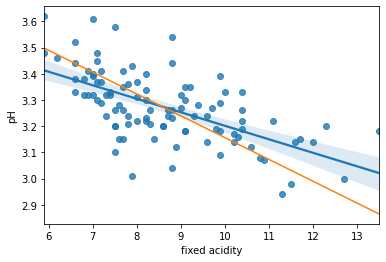

In [252]:
# plot your linear model with regplot and compare
ax = sns.regplot(y='pH', x='fixed acidity', data=sample_wine_df)
plot_line(slope_best, intercept_best, ax)

Compare with the Linear regression used in scikit learn

In [280]:
#import the model
from sklearn.linear_model import LinearRegression

#instanciate the model
model = LinearRegression()

#define X and y
X = sample_wine_df[['fixed acidity']]
y = sample_wine_df['pH']

#train the model on the data
model.fit(X, y)

#check results
#model's slope (a)
print(model.coef_)

#model's intercept (b)
print(model.intercept_)

[-0.051601]
3.7176554637668797


In [254]:
# my best parameters
print(slope_best)
print(intercept_best)


-0.08333333333333334
3.98989898989899


In [255]:
#sklearn best parameters
print(model.coef_)
print(model.intercept_)

[-0.051601]
3.7176554637668797


In [256]:
mse(slope_best, intercept_best, sample_wine_df["fixed acidity"], sample_wine_df.pH)

0.013416852795633101

In [257]:
mse(model.coef_, model.intercept_, sample_wine_df["fixed acidity"], sample_wine_df.pH)

0.010852905727191518

## inference analysis

Get a new sample of 100 with different random state (seed) = 60

In [281]:
wine_samples2 = wine_df.sample(random_state=60,n=100)
wine_samples2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
31,6.9,0.685,0.00,2.5,0.105,22.0,37.0,0.99660,3.46,0.57,10.6,6
844,9.9,0.250,0.46,1.7,0.062,26.0,42.0,0.99590,3.18,0.83,10.6,6
1573,6.0,0.580,0.20,2.4,0.075,15.0,50.0,0.99467,3.58,0.67,12.5,6
150,7.3,0.330,0.47,2.1,0.077,5.0,11.0,0.99580,3.33,0.53,10.3,6
258,7.7,0.410,0.76,1.8,0.611,8.0,45.0,0.99680,3.06,1.26,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1350,9.0,0.600,0.29,2.0,0.069,32.0,73.0,0.99654,3.34,0.57,10.0,5
677,8.6,0.800,0.11,2.3,0.084,12.0,31.0,0.99790,3.40,0.48,9.9,5
712,8.7,0.690,0.00,3.2,0.084,13.0,33.0,0.99920,3.36,0.45,9.4,5
1078,8.6,0.370,0.65,6.4,0.080,3.0,8.0,0.99817,3.27,0.58,11.0,5


Does your best linear model fit with this new sample set ?  Why ?


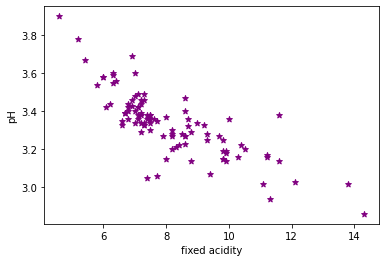

In [282]:
plt.scatter(data=wine_samples2, x='fixed acidity', y='pH', color='purple', marker='*')
plt.xlabel('fixed acidity')
plt.ylabel('pH')
plt.show()

How can you solve the problem ?

In [283]:
model = LinearRegression()
X = wine_samples2[['fixed acidity']]
y = wine_samples2['pH']
model.fit(X, y)
print("Coefficient:",(model.coef_))
print("Intercept:",(model.intercept_))

Coefficient: [-0.07687905]
Intercept: 3.9588041512911536


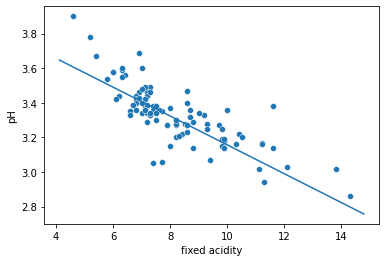

In [284]:
ax = sns.scatterplot(y='pH', x='fixed acidity', data=wine_samples2)
plot_line(slope_best, intercept_best, ax)

# Predict wine quality - regression problem

## Simple Linear regression

Let's try to create a new linear regression. This time, try to find the best model to predict quality in function of pH

Follow the same steps as before: 
- choose a random sample with fixed seed
- use seaborn to see the linear model in this sample
- calculate the best linear regression
- check if the model fits with a new sample

In [45]:
mywinesamples = wine_df.sample(random_state=8,n=100)
mywinesamples

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
145,8.1,0.670,0.55,1.8,0.117,32.0,141.0,0.99680,3.17,0.62,9.4,5
345,7.0,0.685,0.00,1.9,0.067,40.0,63.0,0.99790,3.60,0.81,9.9,5
603,13.2,0.460,0.52,2.2,0.071,12.0,35.0,1.00060,3.10,0.56,9.0,6
319,9.6,0.770,0.12,2.9,0.082,30.0,74.0,0.99865,3.30,0.64,10.4,6
1544,8.4,0.370,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,7
...,...,...,...,...,...,...,...,...,...,...,...,...
353,13.5,0.530,0.79,4.8,0.120,23.0,77.0,1.00180,3.18,0.77,13.0,5
939,6.2,0.460,0.17,1.6,0.073,7.0,11.0,0.99425,3.61,0.54,11.4,5
745,7.3,0.510,0.18,2.1,0.070,12.0,28.0,0.99768,3.52,0.73,9.5,6
85,6.9,0.550,0.15,2.2,0.076,19.0,40.0,0.99610,3.41,0.59,10.1,5


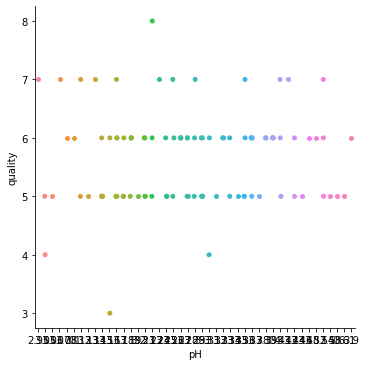

In [46]:
#define x and y
x=mywinesamples['pH']
y=mywinesamples['quality'] 

#catplot pH / quality
sns.catplot(x=x, y=y, data=mywinesamples)

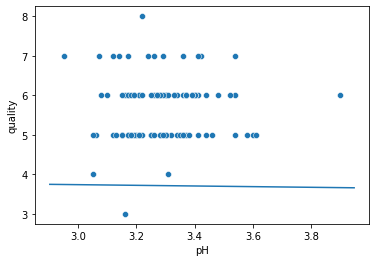

In [47]:
ax2 = sns.scatterplot(y='quality', x='pH', data=mywinesamples)
plot_line(slope_best, intercept_best, ax2)

### Using Holdout method 

Use train split method to divide the dataset in 70% train set and 30% test set

In [48]:
#scores :
#pH / quality : 0,02741
#volatile acidity / quality : 0,0229
#fixed acidity / quality : 0,0971
#pH,alcohol,fixed acidity,density,chlorides / quality: 0,19346
#fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol / pH : 0,46002
#fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality / pH : 0,463422

In [398]:
#PH / quality

# Choose your feature and your target
X = mywinesamples[['pH']]
y = mywinesamples['quality']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)

-0.02741935633268433

In [400]:
#coef and intercept
print('Coef:',model.coef_)
print('Intercept:',model.intercept_)

Coef: [-0.05123891]
Intercept: 5.8680123732469625


<AxesSubplot:xlabel='pH', ylabel='quality'>

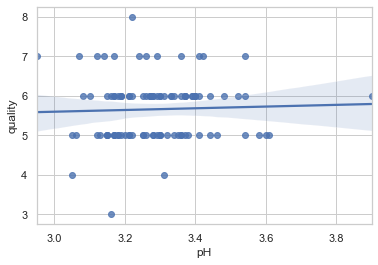

In [401]:
sns.regplot(y='quality', x='pH', data=mywinesamples)

Try another feature. Replace pH with fixed acidity, volatile acidity, ...

Which feature increases this value? 

In [402]:
#volatile acidity / quality

# Choose your feature and your target
X = mywinesamples[['volatile acidity']]
y = mywinesamples['quality']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)

0.022950255259280294

In [403]:
#coef and intercept
print('Coef:',model.coef_)
print('Intercept:',model.intercept_)

Coef: [-1.14018321]
Intercept: 6.317001999182073


<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

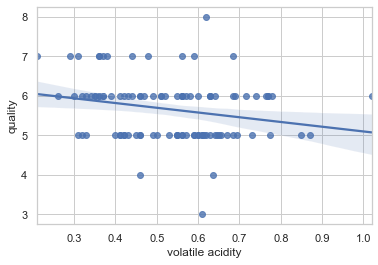

In [404]:
sns.regplot(y='quality', x='volatile acidity', data=mywinesamples)

In [405]:
#volatile fixed / quality

# Choose your feature and your target
X = mywinesamples[['fixed acidity']]
y = mywinesamples['quality']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)

-0.0971070292859586

In [408]:
#coef and intercept
print('Coef:',model.coef_)
print('Intercept:',model.intercept_)

Coef: [0.09908409]
Intercept: 4.84631980675906


<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

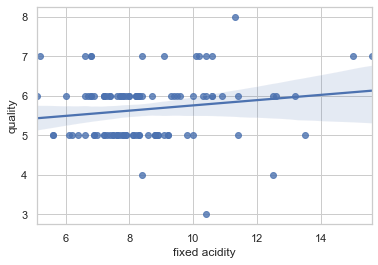

In [409]:
sns.regplot(y='quality', x='fixed acidity', data=mywinesamples)

In [410]:
corr = mywinesamples.corr()

# Unstack correlation matrix 
corr_df = corr.unstack().reset_index() 
corr_df

# rename columns
corr_df.columns = ['feature_1','feature_2', 'correlation'] 

# sort by correlation
corr_df.sort_values(by="correlation",ascending=False, inplace=True) 

# Remove self correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] 
corr_df.head()

,feature_1,feature_2,correlation
7,fixed acidity,density,0.778183
84,density,fixed acidity,0.778183
77,total sulfur dioxide,free sulfur dioxide,0.704293
66,free sulfur dioxide,total sulfur dioxide,0.704293
24,citric acid,fixed acidity,0.670295


## Multi linear regression

Let's add multiple features in the regression model. Then create a new model and compare your results with Simple regression. Is it better or worst? 

In [418]:
# Choose your feature and your target
X = mywinesamples[['pH','alcohol', 'fixed acidity', 'density', 'chlorides']]
y = mywinesamples['quality']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)

0.1934628491526229

In [419]:
#coef and intercept
print('Coef:',model.coef_)
print('Intercept:',model.intercept_)

Coef: [  -0.47669576    0.2990266     0.17503535 -147.69494091   -1.5110335 ]
Intercept: 150.06005978846147


Try with all the features (all without column quality of course). 

Create a new model and compare with the last one. Is it better? Why? 



In [420]:
# Choose your feature and your target
X = mywinesamples[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','sulphates','alcohol']]
y = mywinesamples['pH']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)

0.4600201284969815

If you add the column quality in the variable X, what would happen ? 

In [421]:
# Choose your feature and your target
X = mywinesamples[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','sulphates','alcohol','quality']]
y = mywinesamples['pH']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)

0.4634222653598761

# Predict wine quality - classification problem

## convert quality column in 2 classes

Create a classification version (good or bad) of target variable (quality). To do so, let's consider that the wine with quality equal of higher than 7 is good quality and the rest bad quality. 

You can call the new column goodquality

In [397]:
# Create Classification version of target variable
red_df = wine_df.copy()
red_df['goodquality'] = [1 if x >= 7 else 0 for x in red_df['quality']]
# Separate feature variables and target variable
X = red_df.drop(['quality','goodquality'], axis = 1)
y = red_df['goodquality']
red_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


How many samples are considered as good and how many are bad? Is this balanced

In [396]:
red_df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

## Simple Logistic regression

Try to create a first logistic regression model from a sample

In [361]:
#define new sample data
df_sl=red_df.sample(random_state=8,n=100)
df_sl

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
145,8.1,0.670,0.55,1.8,0.117,32.0,141.0,0.99680,3.17,0.62,9.4,5,0
345,7.0,0.685,0.00,1.9,0.067,40.0,63.0,0.99790,3.60,0.81,9.9,5,0
603,13.2,0.460,0.52,2.2,0.071,12.0,35.0,1.00060,3.10,0.56,9.0,6,0
319,9.6,0.770,0.12,2.9,0.082,30.0,74.0,0.99865,3.30,0.64,10.4,6,0
1544,8.4,0.370,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,13.5,0.530,0.79,4.8,0.120,23.0,77.0,1.00180,3.18,0.77,13.0,5,0
939,6.2,0.460,0.17,1.6,0.073,7.0,11.0,0.99425,3.61,0.54,11.4,5,0
745,7.3,0.510,0.18,2.1,0.070,12.0,28.0,0.99768,3.52,0.73,9.5,6,0
85,6.9,0.550,0.15,2.2,0.076,19.0,40.0,0.99610,3.41,0.59,10.1,5,0


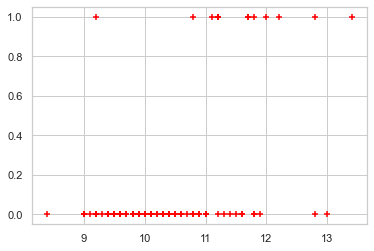

In [395]:
#scatterplot
plt.scatter(x=df_sl.alcohol, y=df_sl.goodquality,marker='+',color='red')

In [363]:
#import 
from sklearn.linear_model import LogisticRegression

In [385]:
#training, fit and predict
X_train, X_test, y_train, y_test = train_test_split(df_sl[['alcohol']],df_sl.goodquality,train_size=0.8)
model = LogisticRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
model.predict_proba(X_test)

array([[0.93361566, 0.06638434],
       [0.88891245, 0.11108755],
       [0.9748804 , 0.0251196 ],
       [0.74357196, 0.25642804],
       [0.96111657, 0.03888343],
       [0.88891245, 0.11108755],
       [0.86460901, 0.13539099],
       [0.91819221, 0.08180779],
       [0.94630135, 0.05369865],
       [0.90931087, 0.09068913],
       [0.8508554 , 0.1491446 ],
       [0.80265503, 0.19734497],
       [0.25382929, 0.74617071],
       [0.72148361, 0.27851639],
       [0.67398474, 0.32601526],
       [0.9262743 , 0.0737257 ],
       [0.96872304, 0.03127696],
       [0.80265503, 0.19734497],
       [0.69826468, 0.30173532],
       [0.9651191 , 0.0348809 ]])

In [386]:
#score
model.score(X_test,y_test)

0.85

In [389]:
#coef and intercept
print('Coef:',model.coef_)
print('Intercept:',model.intercept_)

Coef: [[1.12784734]]
Intercept: [-14.03486184]


In [370]:
#sigmoid function
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def prediction_function(alcohol):
    z = 1.12 * alcohol - 13.86
    y = sigmoid(z)
    return y

In [371]:
df_sl['alcohol'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 145      9.4
345      9.9
603      9.0
319     10.4
1544    11.2
        ... 
353     13.0
939     11.4
745      9.5
85      10.1
1567    10.1
Name: alcohol, Length: 100, dtype: float64>

In [372]:
alcohol = 10
prediction_function(alcohol)

0.06537533342557272

In [373]:
alcohol = 2
prediction_function(alcohol)

8.984506316404241e-06

In [374]:
#import confusion matrix
from sklearn.metrics import confusion_matrix

In [375]:
#confusion matrix
matrix = confusion_matrix(y_test, y_predicted)
matrix

array([[17,  0],
       [ 3,  0]], dtype=int64)

<AxesSubplot:>

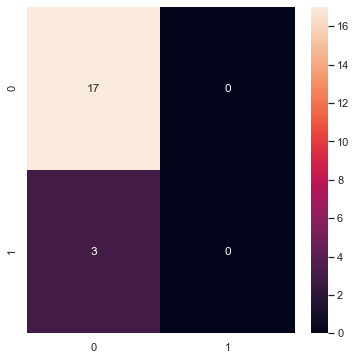

In [376]:
#heatmap
import seaborn as sn
plt.figure(figsize = (6,6))
sn.heatmap(matrix, annot=True)

In classification, how do you evaluate the performance of the model ?

Try different pair of data sets: (pH, goodquality), (fixed acidity, goodquality), (alcohol, goodquality) 

Which pair performs better?

In [ ]:
#alcohol / goodquality


## Multi logistic regression

Add new features to the model, try to find the best model reducing the error. 

Use everything you learned so far and good luck :)

In [391]:
#define X and y
X = red_df.drop(['quality','goodquality'], axis = 1)
y = red_df['goodquality']

#training, fit and predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.8958333333333334

In [379]:
y_predicted = model.predict(X_test)

In [392]:
df_multi = pd.DataFrame({'Valeur actuelle': y_test, 'Prediction':y_predicted})
df_multi.value_counts()

Valeur actuelle  Prediction
0                0             414
1                0              39
                 1              16
0                1              11
dtype: int64

In [393]:
#classification
y_true = y_test
y_pred = y_predicted
target_names = ['Bad wine(0)', 'Good wine(1)']
print(classification_report(y_true,y_pred,target_names=target_names))

              precision    recall  f1-score   support

 Bad wine(0)       0.91      0.97      0.94       425
Good wine(1)       0.59      0.29      0.39        55

    accuracy                           0.90       480
   macro avg       0.75      0.63      0.67       480
weighted avg       0.88      0.90      0.88       480



In [394]:
#confusion matrix
matrix = confusion_matrix(y_test, y_predicted)
matrix

array([[414,  11],
       [ 39,  16]], dtype=int64)

<AxesSubplot:>

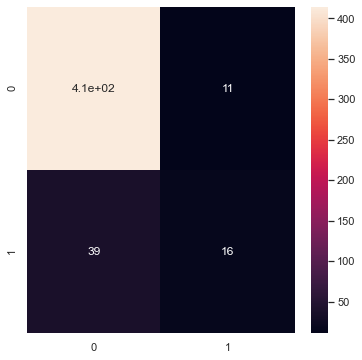

In [383]:
#heatmap
plt.figure(figsize = (6,6))
sn.heatmap(matrix, annot=True)